In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Load dataset
df = pd.read_csv("/content/industrial_robot_control_6G_network.csv")

In [29]:
# Display basic info
display(df.head())
display(df.info())

,robot_id,task_type,task_duration,energy_consumption,position_coordinates,robot_speed,sensor_id,sensor_type,sensor_reading,timestamp,...,slice_id,slice_bandwidth,command_delay,feedback_delay,data_transfer_time,total_delay,signal_strength,latency,resource_allocation,error_rate
0,R001,Pick-and-Place,171.516018,4.733739,"(7.796910002727692, 5.96850157946487, 4.458327...",0.509972,S8,Temperature,88.033450,1/21/2025 10:00,...,Slice2,1755,7.751068,16.084845,20.495129,51.490766,-61.263126,14.177793,82.092408,0.292145
1,R002,Pick-and-Place,123.849798,7.140704,"(1.9967378215835974, 5.142344384136116, 5.9241...",0.451095,S3,Motion,75.115724,1/21/2025 10:01,...,Slice1,1364,8.463407,14.820509,23.665270,54.999170,-45.004153,7.600470,85.865909,0.182236
2,R003,Assembly,119.521822,4.831767,"(5.677003278199915, 0.31313292455558583, 8.422...",0.894730,S4,Pressure,91.818160,1/21/2025 10:02,...,Slice4,1137,13.095382,21.735023,29.305106,72.170683,-61.720025,9.444103,82.479004,0.015636
3,R004,Welding,168.114268,4.794863,"(0.05522117123602399, 8.154614284548341, 7.068...",1.201908,S1,Motion,72.221340,1/21/2025 10:03,...,Slice1,1871,10.562274,23.376825,23.318447,65.214035,-61.758346,13.418651,85.743903,0.971712
4,R005,Pick-and-Place,166.509907,6.245109,"(7.70967179954561, 4.937955963643907, 5.227328...",0.870295,S3,Motion,96.872908,1/21/2025 10:04,...,Slice3,1548,13.097616,14.061224,28.857071,64.010240,-49.156452,18.207018,89.365311,0.295634


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   robot_id              1000 non-null   object 
 1   task_type             1000 non-null   object 
 2   task_duration         1000 non-null   float64
 3   energy_consumption    1000 non-null   float64
 4   position_coordinates  1000 non-null   object 
 5   robot_speed           1000 non-null   float64
 6   sensor_id             1000 non-null   object 
 7   sensor_type           1000 non-null   object 
 8   sensor_reading        1000 non-null   float64
 9   timestamp             1000 non-null   object 
 10  data_size             1000 non-null   int64  
 11  network_load          1000 non-null   float64
 12  network_latency       1000 non-null   float64
 13  packet_loss_rate      1000 non-null   float64
 14  network_type          1000 non-null   object 
 15  slice_id              

None

In [59]:
def preprocess_data(df):
    # Drop irrelevant columns if they exist
    cols_to_drop = ["robot_id", "task_type", "position_coordinates", "sensor_id", "sensor_type", "timestamp", "network_type", "slice_id"]
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

    # Handle missing values by filling with mean
    df = df.fillna(df.mean(numeric_only=True))

    return df

df = preprocess_data(df)

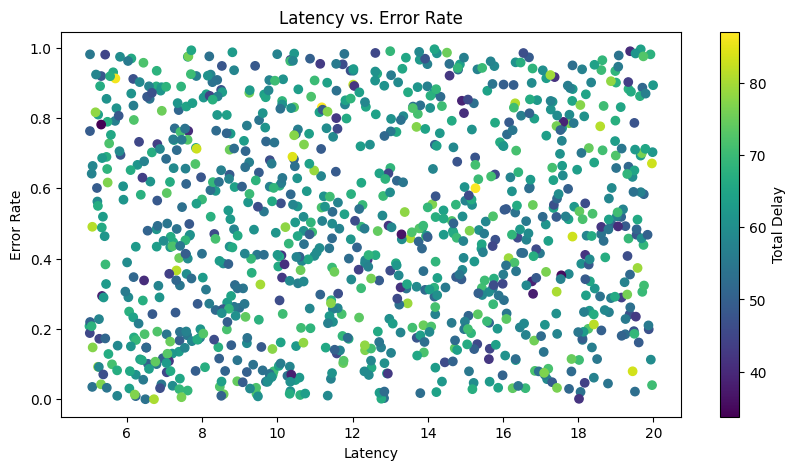

In [44]:
# Visualizing data
plt.figure(figsize=(10, 5))
plt.scatter(df['latency'], df['error_rate'], c=df['total_delay'], cmap='viridis')
plt.colorbar(label='Total Delay')
plt.xlabel('Latency')
plt.ylabel('Error Rate')
plt.title('Latency vs. Error Rate')
plt.show()

In [52]:
# Define features and target variable
X = df[['task_duration', 'energy_consumption', 'robot_speed', 'sensor_reading', 'network_load', 'network_latency', 'packet_loss_rate', 'command_delay', 'feedback_delay', 'total_delay', 'latency', 'resource_allocation']]
y = df['error_rate']


In [53]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Make predictions
y_pred = model.predict(X_test)


In [56]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [57]:
print(f"Mean Squared Error: {mse}")
print(f"R-Square: {r2}")


Mean Squared Error: 0.0831822547957195
R-Square: -0.030259601233100675


In [58]:
# Summary of findings
print("\nSummary:")
print("- The model was trained to predict error rate based on task, network, and delay parameters.")
print("- Performance metrics indicate how well the model explains error rate variations.")



Summary:
- The model was trained to predict error rate based on task, network, and delay parameters.
- Performance metrics indicate how well the model explains error rate variations.
